In [1]:
from tqdm import tqdm 
from xml.etree import ElementTree as ET
from datetime import datetime
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


## Graph

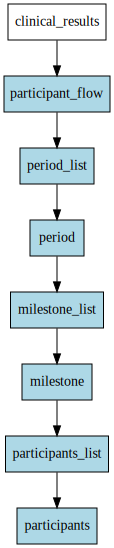

In [78]:
from graphviz import Digraph
from IPython.display import display
import random
def create_hierarchy_graph(dot, egdes, feature_name, created_nodes):
    # 定义不同层级的颜色
    level_colors = {
        1: 'lightblue',
        2: 'lightgreen',
        3: 'yellow',
        4: 'orange',
        5: 'red',
        6: 'purple',
        7: 'pink',
        8: 'grey',
        9: 'cyan',  # 可以根据实际层级数量调整或添加更多颜色
        10: 'hotpink',
        11: 'ivory',
        12: 'blue',
        13: 'lawngreen',
        14: 'lavender',
        15: 'khaki',
        16: 'olivedrab1',
        17: 'paleturquoise',
        18: 'papayawhip',
        19: 'peachpuff',
    }
    nodes = feature_name.split('/')
    node_paths = []  # 用于存储每个节点的唯一路径标识符
    node_count = {}  # 用于计数并生成唯一ID

    for i in range(len(nodes)):
        if i == 0:
            node_paths.append(nodes[i])
            dot.node(nodes[i], label=nodes[i], shape='rect')
        else:
            unique_id = f"{'/'.join(nodes[:i])}/{nodes[i]}"
            # unique_id = f"{nodes[i-1]}/{nodes[i]}"
            if len(nodes[:i]) > 1:
                color = all_color
                # print(color)
            elif len(nodes[:i]) == 1:
                if unique_id in created_nodes.keys():
                    color = created_nodes[unique_id]['color']
                    all_color = color
                else:
                    # color = level_colors.get(i + 1, 'white')
                    color = level_colors.get((len(created_nodes) + 1) % len(level_colors), 'white')
                    created_nodes[unique_id] = {'color': color}
                    all_color = color

            node_paths.append(unique_id)
            dot.node(unique_id, label=nodes[i], shape='rect', style='filled', fillcolor=color)
            edge = (node_paths[i-1], node_paths[i])
            if edge not in edges:
                edges.append(edge)
                dot.edge(*edge)

            

    
edges = []
dot = Digraph(comment='Hierarchy Graph')
feature_name = 'clinical_results/participant_flow/period_list/period/milestone_list/milestone/participants_list/participants'
create_hierarchy_graph(dot, edges, feature_name, created_nodes={})
display(dot)

Clinical Trial/acronym 0
Clinical Trial/arm_group/arm_group_label 1
Clinical Trial/arm_group/arm_group_type 2
Clinical Trial/arm_group/description 2
Clinical Trial/biospec_descr/textblock 2
Clinical Trial/biospec_retention 3
Clinical Trial/brief_summary/textblock 4
Clinical Trial/brief_title 5
Clinical Trial/clinical_results/baseline/analyzed_list/analyzed/count_list/count{group_id} 6
Clinical Trial/clinical_results/baseline/analyzed_list/analyzed/count_list/count{value} 7
Clinical Trial/clinical_results/baseline/analyzed_list/analyzed/scope 7
Clinical Trial/clinical_results/baseline/group_list/group/description 7
Clinical Trial/clinical_results/baseline/group_list/group/description 7
Clinical Trial/clinical_results/baseline/group_list/group/title 7
Clinical Trial/clinical_results/baseline/group_list/group{group_id} 7
Clinical Trial/clinical_results/baseline/measure_list/measure/analyzed_list/analyzed/count_list/count{group_id} 7
Clinical Trial/clinical_results/baseline/measure_list/me

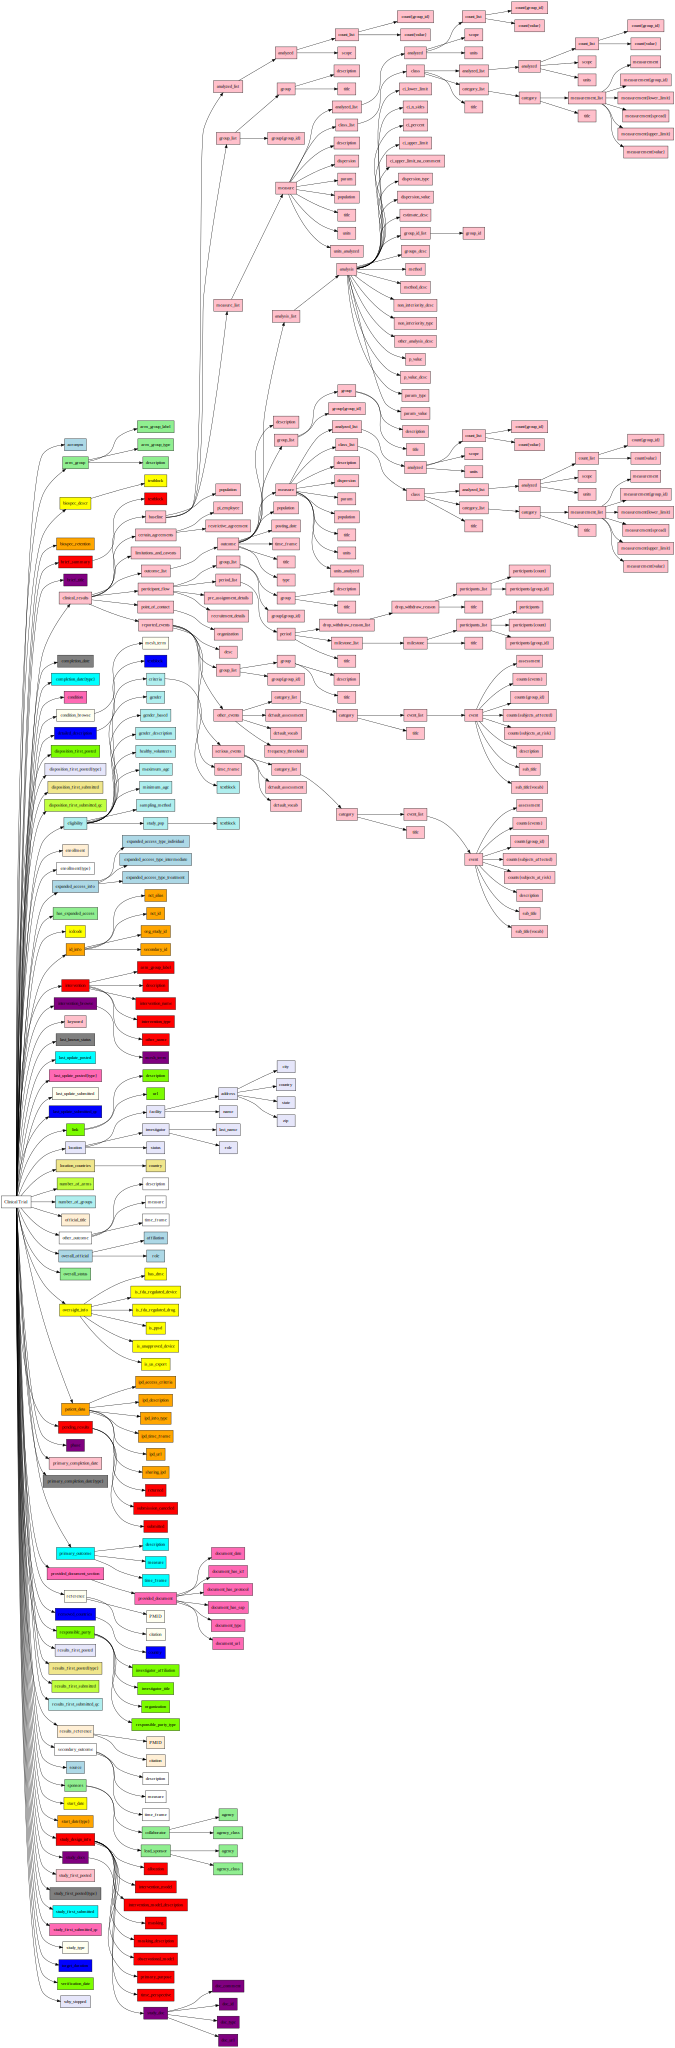

In [80]:
feature_info = pd.read_csv('feature-select.csv')
dot = Digraph(comment='Feature Hierarchy')
dot.attr(rankdir='LR')
edges = []
created_nodes = {}
feature_names = sorted(feature_info['feature_name'].to_list())
for name in feature_names:
    name = 'Clinical Trial/' + name 
    print(name, len(created_nodes))
    if 'textblock' in name:
        name = name.replace('\textblock', '')
    create_hierarchy_graph(dot, edges, name, created_nodes)
    
dot.render('feature_hierarchy_color', format='pdf', cleanup=True)
display(dot)


## feature-select

In [35]:
feature_info = pd.read_csv('feature-select.csv').set_index('feature_name')
feature_info

,备注,Number,Percent,Sample1,Sample2,Sample3,Sample4,trial failure reason prediction**,trial eligibility criteria design**,trial duration prediction,trial approval prediction,trial failure reason prediction,trial recruitment prediction,trial eligibility criteria design,drug dose prediction (?),drug repurposing,Adverse Event Prediction（可能包括不良事件的类型，受伤和死亡人数）,Patient Amount Time-Series Forecasting（就是病人的数量会有变化的，一开始可能纳入一些人，后来可能就跑路或者死亡了）
feature_name,,,,,,,,,,,,,,,,,,
id_info/org_study_id,NaN,483179,0.999876,NCRR-M01RR01070-0506,NCRR-M01RR00400-0587,2002LS032,NCRR-M01RR03186-9943,N,？,？,？,？,？,？,？,？,？,？
id_info/secondary_id,NaN,97797,0.202378,M01RR001070,M01RR000400,MT1999-06,M01RR003186,N,？,？,？,？,？,？,？,？,？,？
id_info/nct_id,索引ID,483239,1.000000,NCT00000102,NCT00000104,NCT00000105,NCT00000106,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y
brief_title,NaN,483239,1.000000,Congenital Adrenal Hyperplasia: Calcium Channe...,Does Lead Burden Alter Neuropsychological Deve...,Vaccination With Tetanus and KLH to Assess Imm...,41.8 Degree Centigrade Whole Body Hyperthermia...,Y,Y,Y,Y,Y,Y,Y,N,N,N,N
sponsors/lead_sponsor/agency,NaN,483239,1.000000,National Center for Research Resources (NCRR),National Center for Research Resources (NCRR),"Masonic Cancer Center, University of Minnesota",National Center for Research Resources (NCRR),N,N,？,？,？,？,？,？,？,？,？
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
clinical_results/baseline/measure_list/measure/analyzed_list/analyzed/units,NaN,107,0.000221,"['Participants', 'community', 'Participants', ...","['Participants', 'limbs', 'Participants', 'lim...","['Participants', 'warts', 'Participants', 'war...","['Participants', 'ICUs', 'Participants', 'ICUs...",N,N,N,N,N,N,N,N,N,N,N
clinical_results/baseline/measure_list/measure/analyzed_list/analyzed/scope,NaN,107,0.000221,"['Measure', 'Measure', 'Measure', 'Measure', '...","['Measure', 'Measure', 'Measure', 'Measure', '...","['Measure', 'Measure', 'Measure', 'Measure', '...","['Measure', 'Measure', 'Measure', 'Measure', '...",N,N,N,N,N,N,N,N,N,N,N
clinical_results/baseline/measure_list/measure/analyzed_list/analyzed/count_list/count{group_id},NaN,107,0.000221,"['B1', 'B2', 'B3', 'B4', 'B5', 'B1', 'B2', 'B3...","['B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1']","['B1', 'B2', 'B3', 'B1', 'B2', 'B3', 'B1', 'B2...","['B1', 'B2', 'B3', 'B1', 'B2', 'B3', 'B1', 'B2...",N,N,N,N,N,N,N,N,N,N,N


In [2]:
All_data = []
for i in range(10):
    All_data.append(pd.read_csv(f'../../preprocess_data/All_data_part{i}.csv', index_col=0, low_memory=False))
    # print(len(All_data[i].columns))
    
All_Ori = pd.concat(All_data)

## 以adverse-event的为基础，处理特征

In [4]:
handmake = pd.read_csv('adverse-event-rate-prediction/mortality_rate_MI_handmake.csv',index_col=0)
handmake = handmake[handmake['____/__'] == 'Y']
selected_feature = list(handmake.index)
selected_feature

['phase',
 'study_type',
 'has_expanded_access',
 'study_design_info/intervention_model',
 'study_design_info/primary_purpose',
 'eligibility/gender',
 'eligibility/healthy_volunteers',
 'oversight_info/has_dmc',
 'study_design_info/allocation',
 'patient_data/sharing_ipd',
 'oversight_info/is_fda_regulated_drug',
 'oversight_info/is_fda_regulated_device',
 'eligibility/minimum_age',
 'eligibility/maximum_age',
 'number_of_arms',
 'id_info/nct_id',
 'brief_title',
 'brief_summary/textblock',
 'study_design_info/masking',
 'condition',
 'intervention/intervention_type',
 'intervention/intervention_name',
 'eligibility/criteria/textblock',
 'location/facility/address/city',
 'condition_browse/mesh_term',
 'intervention_browse/mesh_term',
 'icdcode',
 'keyword',
 'enrollment',
 'arm_group/arm_group_type']

In [5]:
selected_feature.extend(['eligibility/sampling_method', 'patient_data/ipd_info_type', 'sponsors/lead_sponsor/agency_class', 'completion_date{type}', 'start_date{type}', 'enrollment{type}',
                         'responsible_party/responsible_party_type', 'study_design_info/observational_model', 'study_design_info/time_perspective', 'biospec_retention',
                        #  'clinical_results/baseline/measure_list/measure/dispersion', 'clinical_results/baseline/measure_list/measure/param', 
                        #  'clinical_results/reported_events/serious_events/category_list/category/event_list/event/assessment',
                        #  'clinical_results/outcome_list/outcome/analysis_list/analysis/dispersion_type',
                        #  'clinical_results/outcome_list/outcome/analysis_list/analysis/non_inferiority_type'
                         ])
print(len(selected_feature))

40


In [6]:
features = pd.read_csv('adverse-event-rate-prediction/mortality_rate_MI.csv',index_col=0)
r = []
for f in features.index:
    if f in selected_feature:
        r.append("Y")
    else:
        r.append("N")

features["Selected"] = r
features.to_csv('adverse-event-rate-prediction/selected_feature.csv')

In [7]:
All = All_Ori[selected_feature]

### 将study_design_info/masking处理成Multi-hot和 masking num

In [8]:
All['study_design_info/masking'].value_counts()

study_design_info/masking
None (Open Label)                                                          204096
Quadruple (Participant, Care Provider, Investigator, Outcomes Assessor)     33975
Double (Participant, Investigator)                                          24732
Single (Outcomes Assessor)                                                  23295
Single (Participant)                                                        20871
Triple (Participant, Investigator, Outcomes Assessor)                       10395
Triple (Participant, Care Provider, Investigator)                           10328
Double (Participant, Outcomes Assessor)                                     10319
Double                                                                       6116
Single (Investigator)                                                        6083
Double (Investigator, Outcomes Assessor)                                     4810
Double (Participant, Care Provider)                                     

In [9]:
def get_masking_num(x):
    if pd.isnull(x):
        return None
    if 'Double' in x:
        return 2
    elif 'Single' in x:
        return 1
    elif 'Triple' in x:
        return 3
    elif 'Quadruple' in x:
        return 4
    else:
        return 0

All['study_design_info/masking_num'] = All['study_design_info/masking'].apply(get_masking_num)

/tmp/ipykernel_303447/342669512.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All['study_design_info/masking_num'] = All['study_design_info/masking'].apply(get_masking_num)


In [10]:
All['study_design_info/masking_num'].value_counts()

study_design_info/masking_num
0.0    204096
1.0     52650
2.0     50652
4.0     33975
3.0     24598
Name: count, dtype: int64

In [11]:
def get_masking_multihot(x):
    # Indent the code block properly
    if pd.isnull(x):
        return [None, None, None, None]
    vector = [0, 0, 0, 0]
    if 'Participant' in x:
        vector[0] = 1
    if 'Care Provider' in x:
        vector[1] = 1
    if 'Investigator' in x:
        vector[2] = 1
    if 'Outcomes Assessor' in x:
        vector[3] = 1
    if get_masking_num(x) != 0 and sum(vector) == 0:
        return [None, None, None, None]
    assert sum(vector) == get_masking_num(x)
    return vector

masking_multihot = pd.DataFrame(All['study_design_info/masking'].apply(get_masking_multihot).tolist(), index=All.index, columns = ['MaskingType-Participant', 'MaskingType-Care Provider', 'MaskingType-Investigator', 'MaskingType-Outcomes Assessor'])
All = pd.merge(All, masking_multihot, right_index=True, left_index=True)
print(len(All.columns))

45


In [10]:
# 卸磨杀驴
All = All.drop('study_design_info/masking', axis=1)

### 将arm_group/arm_group_type处理成

Placebo Comparator Arm Number	

Experimental Arm Number	

No Intervention Arm Number	

Active Comparator Arm Number	

Other Arm Number	

Sham Comparator Arm Number

In [12]:
value = All['arm_group/arm_group_type']['NCT00001259']

def arm_group_type_2Mulitlabel(value):
    if type(value) == list:
        counts = dict(Counter(value))
    elif type(value) == str and value[0] != '[':
        counts = {value+' Arm Number':1}
    elif type(value) == str and value[0] == '[':
        value = eval(value)
        counts = dict(Counter(value))
        # for key, value in counts.items():
        counts = {key+' Arm Number':value for key, value in counts.items()}
    else: 
        counts = {}
        
    return counts

arm_group_type_2Mulitlabel(value)

{'Placebo Comparator Arm Number': 1, 'Experimental Arm Number': 6}

In [13]:
All = pd.merge(All, pd.DataFrame(All['arm_group/arm_group_type'].apply(arm_group_type_2Mulitlabel).tolist(), index=All.index), left_index=True, right_index=True)
print(len(All.columns))
# 卸磨杀驴
# All = All.drop('arm_group/arm_group_type', axis=1)

51


### 将intervention/intervention_type处理成multi label

In [14]:
All['intervention/intervention_type'].value_counts()

intervention/intervention_type
Drug                                                                      61032
['Drug', 'Drug']                                                          57942
Other                                                                     42591
Device                                                                    32324
Behavioral                                                                23488
                                                                          ...  
['Procedure', 'Procedure', 'Procedure', 'Procedure', 'Drug', 'Device']        1
['Drug', 'Drug', 'Drug', 'Drug', 'Drug', 'Behavioral']                        1
['Procedure', 'Biological', 'Drug', 'Procedure']                              1
['Device', 'Behavioral', 'Other', 'Device']                                   1
['Device', 'Diagnostic Test', 'Device', 'Device']                             1
Name: count, Length: 6889, dtype: int64

In [16]:
def intervention_type_2Mulitlabel(value):
    if type(value) == list:
        counts = dict(Counter(value))
    elif type(value) == str and value[0] != '[':
        counts = {value+' intervention Number':1}
    elif type(value) == str and value[0] == '[':
        value = eval(value)
        counts = dict(Counter(value))
        # for key, value in counts.items():
        counts = {key+' intervention Number':value for key, value in counts.items()}
    else: 
        counts = {}
        
    return counts


All = pd.merge(All, pd.DataFrame(All['intervention/intervention_type'].apply(intervention_type_2Mulitlabel).tolist(), index=All.index), left_index=True, right_index=True)
print(len(All.columns))
# 卸磨杀驴
# All = All.drop('intervention/intervention_type', axis=1)

62


In [17]:
All.columns

Index(['phase', 'study_type', 'has_expanded_access',
       'study_design_info/intervention_model',
       'study_design_info/primary_purpose', 'eligibility/gender',
       'eligibility/healthy_volunteers', 'oversight_info/has_dmc',
       'study_design_info/allocation', 'patient_data/sharing_ipd',
       'oversight_info/is_fda_regulated_drug',
       'oversight_info/is_fda_regulated_device', 'eligibility/minimum_age',
       'eligibility/maximum_age', 'number_of_arms', 'id_info/nct_id',
       'brief_title', 'brief_summary/textblock', 'study_design_info/masking',
       'condition', 'intervention/intervention_type',
       'intervention/intervention_name', 'eligibility/criteria/textblock',
       'location/facility/address/city', 'condition_browse/mesh_term',
       'intervention_browse/mesh_term', 'icdcode', 'keyword', 'enrollment',
       'arm_group/arm_group_type', 'eligibility/sampling_method',
       'patient_data/ipd_info_type', 'sponsors/lead_sponsor/agency_class',
       'comp

In [18]:
print(All.shape)

(483239, 62)


In [17]:
All.to_csv('All_data_prepared.csv')

duration 里enrollment两个全扔  四个全扔 enrollment type GDP+人口+老龄化程度

In [22]:
All = All.drop('enrollment{type}', axis=1)

,enrollment{type},enrollment{type}
NCT00000102,NaN,NaN
NCT00000104,NaN,NaN
NCT00000105,Actual,Actual
NCT00000106,NaN,NaN
NCT00000107,NaN,NaN
...,...,...
NCT06264297,Anticipated,Anticipated
NCT06264310,Anticipated,Anticipated
NCT06264323,Actual,Actual
NCT06264336,Anticipated,Anticipated


### city 转成GDP　population　aging　percent

In [20]:
import re

def remove_non_numeric(s):
    pattern = r'[^0-9.]'
    return re.sub(pattern, '', s)

def refine(x):
    # print(x)
    gdp, people, age = x.split(',')
    gdp = remove_non_numeric(gdp)
    people = remove_non_numeric(people)
    age = remove_non_numeric(age)
    if len(gdp) == 0:
        gdp = '0'
    if len(people) == 0:
        people = '0'
    if len(age) == 0:
        age = '0'
    return gdp, people, age

def map2value(x):
    x = re.sub(r"\s+", " ", x)
    if len(x.split(' ')) == 2:
        if len(x.split(' ')[-1].split(',')) == 3:
            return refine(x.split(' ')[-1])
        elif len(x.split(' ')[-1].split(',')) > 3:
            return refine(','.join(x.split(' ')[-1].split(',')[-3:]))
        elif len(x.split(' ')[-1].split(',')) < 3:
            return map2value(''.join(x.split(' ')))
    elif len(x.split(' ')) == 1:
        if len(x.split(',')) == 3 :
            return refine(x)
        elif len(x.split(',')) > 3:
            return refine(','.join(x.split(',')[-3:]))
        else:
            return refine(','.join(['0', x]))
    elif len(x.split(' ')) == 3:
        lis = x.split(' ')
        lis = list(filter(lambda a: a != '', lis))
        x = ' '.join(lis)
        if len(x.split(',')) == 3 :
            # print(x.split(' '),''.join(x.split(' ')[-3:]))
            return map2value(''.join(x.split(' ')[-3:]))
    elif len(x.split(' ')) == 4:
        lis = x.split(' ')
        lis = list(filter(lambda a: a != '', lis))
        x = ' '.join(lis[1:])
        if len(x.split(',')) == 3 :
            # print(x.split(' '),''.join(x.split(' ')[-3:]))
            return map2value(''.join(x.split(' ')))
    elif len(x.split(' ')) > 4:
        lis = x.split(' ')
        lis = list(filter(lambda a: a != '', lis))
        x = ' '.join(lis[1:])
        if len(x.split(',')) == 3 :
            # print(x.split(' '),''.join(x.split(' ')[-3:]))
            return map2value(''.join(x.split(' ')))
    else:
        print(len(x.split(' ')), x)
        

    


In [21]:
city_labels = pd.read_csv('city_labels_afternaafternaaaaaa.csv', index_col=0)
GDP = []
Population = []
Aging = []
def transfer2city(x):
    if pd.isnull(x):
        GDP.append(None)
        Population.append(None)
        Aging.append(None)

    elif type(x) == str and x[0]!='[':
        x = x.title()
        result = city_labels.loc[x, 'label'].strip().replace('  ', ' ')
        gdp, people, age = map2value(result)
        GDP.append(eval(gdp))
        Population.append(eval(people))
        Aging.append(eval(age))
        
    elif type(x) == str and x[0]=='[' and x[-1] ==']':
        try:
            city_lis = eval(x)
            gdps, peoples, ages = [], [], []
            for x in city_lis:
                x = x.title()
                result = city_labels.loc[x, 'label'].strip().replace('  ', ' ')
                gdp, people, age = map2value(result)
                gdps.append(eval(gdp))
                peoples.append(eval(people))
                ages.append(eval(age))

            GDP.append(sum(gdps)/len(gdps))
            Population.append(sum(peoples)/len(peoples))
            Aging.append(sum(ages)/len(ages))
        except:
            try:
                result = city_labels.loc[x, 'label'].strip().replace('  ', ' ')
                # print(result)
                gdp, people, age = map2value(result)
                # print(gdp, people, age)
                GDP.append(eval(gdp))
                Population.append(eval(people))
                Aging.append(eval(age))
            except:
                GDP.append(None)
                Population.append(None)
                Aging.append(None)
            
    elif type(x) == list:
        city_lis = x
        gdps, peoples, ages = [], [], []
        for x in city_lis:
            x = x.title()
            result = city_labels.loc[x, 'label'].strip().replace('  ', ' ')
            gdp, people, age = map2value(result)
            gdps.append(eval(gdp))
            peoples.append(eval(people))
            ages.append(eval(age))

        GDP.append(sum(gdps)/len(gdps))
        Population.append(sum(peoples)/len(peoples))
        Aging.append(sum(ages)/len(ages))               
    else:
        try:
            result = city_labels.loc[x, 'label']
            gdp, people, age = map2value(result)
            GDP.append(eval(gdp))
            Population.append(eval(people))
            Aging.append(eval(age))
        except:
            GDP.append(None)
            Population.append(None)
            Aging.append(None)

for c in All['location/facility/address/city']:
    transfer2city(c)

All['location/facility/address/city-GDP'] = GDP
All['location/facility/address/city-Population'] = Population
All['location/facility/address/city-Aging'] = Aging


In [76]:
All.to_csv('All_data_prepared-GDP.csv')

以下两个是GPT处理前的操作

In [26]:
city_dict = {}
def singcity(x):
    if type(x) == str and x[0]!='[':
        x = x.title()
        if x in city_dict.keys():
            city_dict[x] += 1
        else:
            city_dict[x] = 1
        return x
    elif type(x) == str and x[0]=='[' and x[-1] ==']':
        try:
            city_lis = eval(x)
        except:
            return x
        for x in city_lis:
            x = x.title()
            if x in city_dict.keys():
                city_dict[x] += 1
            else:
                city_dict[x] = 1
        return city_lis
    elif type(x) == list:
        city_lis = x
        for x in city_lis:
            x = x.title()
            if x in city_dict.keys():
                city_dict[x] += 1
            else:
                city_dict[x] = 1
        return city_lis               
    else:
        return x
temp = All['location/facility/address/city'].apply(singcity)

In [ ]:
temp.value_counts()

In [29]:
for k,v in city_dict.items():
    print(k, v)

Charleston 6674
Minneapolis 8323
Madison 4549
Burlington 3213
Ann Arbor 7693
Birmingham 12046
New Haven 5312
Boston 24082
Philadelphia 18338
Houston 24377
Rochester 12544
Bethesda 6412
Los Angeles 19053
San Francisco 9794
Gainesville 5096
Atlanta 13639
Chicago 20136
Lexington 4793
Baltimore 14578
East Lansing 425
Royal Oak 1627
Columbia 4061
St. Louis 2676
Syracuse 2513
Charlotte 5840
Cleveland 11628
Pittsburgh 11185
Salt Lake City 8440
Charlottesville 3395
Richmond 6666
Morgantown 1539
Helsingborg 276
Malmo 322
Washington 8316
Miami 14499
Indianapolis 9341
Louisville 5778
New Orleans 5673
Dearborn 726
Durham 8371
Cincinnati 11845
Columbus 12853
Portland 11120
Nashville 10797
Dallas 14608
San Antonio 12119
New York 30167
Milwaukee 5845
Irvine 1455
La Jolla 3831
Tampa 8766
Newark 4374
Chapel Hill 5133
Little Rock 4752
Iowa City 3797
Seattle 13313
Chevy Chase 516
Southfield 695
Berkeley 706
Fullerton 857
Ft. Lauderdale 237
Bloomington 1279
Scranton 449
La Crosse 817
Buffalo 3671
Mesa 102

In [34]:
pd.DataFrame(city_dict.values(), index=city_dict.keys()).to_csv('city.csv')

### 删除和 target 对应的条数里面太少(全为nan)的和所有值都一样的部分

In [23]:
task_name = 'adverse-event-rate-prediction'
target = pd.read_csv(f'{task_name}/output.csv', index_col=0)
part = All.loc[target.index]
drop_feature = ['enrollment{type}']
for c in part.columns:
    if part[c].isnull().sum() == len(part):
        print(f'{c} is all null!')
        drop_feature.append(c)
    if part[c].nunique(dropna=True) == 1:  # 除去缺失值后的所有值一样 即方差为0
        print(f'{c} is unique!')
        drop_feature.append(c)

part = part.drop(drop_feature, axis=1)
part

start_date{type} is unique!


,phase,study_type,has_expanded_access,study_design_info/intervention_model,study_design_info/primary_purpose,eligibility/gender,eligibility/healthy_volunteers,oversight_info/has_dmc,study_design_info/allocation,patient_data/sharing_ipd,...,Behavioral intervention Number,Other intervention Number,Dietary Supplement intervention Number,Genetic intervention Number,Radiation intervention Number,Diagnostic Test intervention Number,Combination Product intervention Number,location/facility/address/city-GDP,location/facility/address/city-Population,location/facility/address/city-Aging
ntcid,,,,,,,,,,,,,,,,,,,,,
NCT00001259,Phase 1,Interventional,No,Crossover Assignment,Treatment,Female,No,NaN,Non-Randomized,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.20,0.2,15.7
NCT00001277,Phase 2,Interventional,No,Parallel Assignment,Diagnostic,All,No,No,Non-Randomized,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.20,0.2,15.7
NCT00001305,Phase 3,Interventional,No,Single Group Assignment,Treatment,All,No,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.20,0.2,15.7
NCT00001322,Phase 1/Phase 2,Interventional,No,Crossover Assignment,Basic Science,Female,Accepts Healthy Volunteers,NaN,Non-Randomized,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.20,0.2,15.7
NCT00001849,Phase 2,Interventional,No,Single Group Assignment,Diagnostic,All,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.20,0.2,15.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCT06002347,NaN,Interventional,No,Single Group Assignment,Prevention,All,Accepts Healthy Volunteers,No,NaN,No,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,25.40,228.2,13.7
NCT06033079,NaN,Interventional,No,Parallel Assignment,Health Services Research,All,No,Yes,Randomized,No,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,88.50,0.7,16.9
NCT06076681,Phase 1/Phase 2,Interventional,No,Parallel Assignment,Treatment,All,Accepts Healthy Volunteers,No,Randomized,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.86,10.3,17.3


#### 划分训练测试 

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split


In [32]:
tasks = ['serious_adverse_rate', 'mortality_rate']
for task in tasks:
    part[task] = target[task]
    train_index, test_index = train_test_split(part, test_size=0.2, random_state=42)
    train_x = train_index.drop(task, axis=1)
    train_y = train_index[task]
    test_x = test_index.drop(task, axis=1)
    test_y = test_index[task]
    print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)
    train_x.to_csv(f'{task_name}/{task}_train_x.csv')
    train_y.to_csv(f'{task_name}/{task}_train_y.csv')
    test_x.to_csv(f'{task_name}/{task}_test_x.csv')
    test_y.to_csv(f'{task_name}/{task}_test_y.csv')
    part = part.drop(task, axis=1)


(25044, 63) (25044,) (6262, 63) (6262,)
(25044, 63) (25044,) (6262, 63) (6262,)


## trial-duration-prediction

In [35]:
task_name = 'trial-duration-prediction'
target = pd.read_csv(f'{task_name}/output.csv', index_col=0)
part = All.loc[target.index]
drop_feature = ['enrollment{type}', 'enrollment']  # duration 里不使用enrollment
for c in part.columns:
    if part[c].isnull().sum() == len(part):
        print(f'{c} is all null!')
        drop_feature.append(c)
    if part[c].nunique(dropna=True) == 1:  # 除去缺失值后的所有值一样 即方差为0
        print(f'{c} is unique!')
        drop_feature.append(c)

part = part.drop(drop_feature, axis=1)
part

,phase,study_type,has_expanded_access,study_design_info/intervention_model,study_design_info/primary_purpose,eligibility/gender,eligibility/healthy_volunteers,oversight_info/has_dmc,study_design_info/allocation,patient_data/sharing_ipd,...,Behavioral intervention Number,Other intervention Number,Dietary Supplement intervention Number,Genetic intervention Number,Radiation intervention Number,Diagnostic Test intervention Number,Combination Product intervention Number,location/facility/address/city-GDP,location/facility/address/city-Population,location/facility/address/city-Aging
ntcid,,,,,,,,,,,,,,,,,,,,,
NCT00000105,NaN,Observational,No,NaN,NaN,All,Accepts Healthy Volunteers,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190.00,4.100,23.70
NCT00000113,Phase 3,Interventional,No,Parallel Assignment,Treatment,All,No,Yes,Randomized,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,271.05,3.150,15.10
NCT00000114,Phase 3,Interventional,No,Factorial Assignment,Treatment,All,NaN,NaN,Randomized,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NCT00000115,Phase 2,Interventional,No,Crossover Assignment,Treatment,All,NaN,NaN,Randomized,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NCT00000116,Phase 3,Interventional,No,Parallel Assignment,Treatment,All,Accepts Healthy Volunteers,Yes,Randomized,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,69.30,0.100,17.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCT06264297,NaN,Interventional,No,Parallel Assignment,Treatment,All,No,No,Randomized,Undecided,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1922.40,24.900,18.70
NCT06264310,Phase 2,Interventional,No,Parallel Assignment,Treatment,All,No,Yes,Randomized,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.88,0.408,19.12
NCT06264323,NaN,Observational,No,NaN,NaN,All,Accepts Healthy Volunteers,No,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,131.800,29.60


In [36]:
tasks = ['year']
target['year'] = target['time_day'].apply(lambda x: x/365)
for task in tasks:
    part[task] = target[task]
    train_index, test_index = train_test_split(part, test_size=0.2, random_state=42)
    train_x = train_index.drop(task, axis=1)
    train_y = train_index[task]
    test_x = test_index.drop(task, axis=1)
    test_y = test_index[task]
    print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)
    train_x.to_csv(f'{task_name}/train_x.csv')
    train_y.to_csv(f'{task_name}/train_y.csv')
    test_x.to_csv(f'{task_name}/test_x.csv')
    test_y.to_csv(f'{task_name}/test_y.csv')
    part = part.drop(task, axis=1)

(370088, 63) (370088,) (92522, 63) (92522,)


## patient-dropout-prediction

In [37]:
task_name = 'patient-dropout-prediction'
target = pd.read_csv(f'{task_name}/output.csv', index_col=0)
part = All.loc[target.index]
drop_feature = ['enrollment{type}', ]  # duration 里不使用enrollment
for c in part.columns:
    if part[c].isnull().sum() == len(part):
        print(f'{c} is all null!')
        drop_feature.append(c)
    if part[c].nunique(dropna=True) == 1:  # 除去缺失值后的所有值一样 即方差为0
        print(f'{c} is unique!')
        drop_feature.append(c)

part = part.drop(drop_feature, axis=1)
part

start_date{type} is unique!


,phase,study_type,has_expanded_access,study_design_info/intervention_model,study_design_info/primary_purpose,eligibility/gender,eligibility/healthy_volunteers,oversight_info/has_dmc,study_design_info/allocation,patient_data/sharing_ipd,...,Behavioral intervention Number,Other intervention Number,Dietary Supplement intervention Number,Genetic intervention Number,Radiation intervention Number,Diagnostic Test intervention Number,Combination Product intervention Number,location/facility/address/city-GDP,location/facility/address/city-Population,location/facility/address/city-Aging
ntcid,,,,,,,,,,,,,,,,,,,,,
NCT00000125,Phase 3,Interventional,No,Parallel Assignment,Prevention,All,No,Yes,Randomized,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NCT00000134,Phase 3,Interventional,No,Factorial Assignment,Treatment,All,No,Yes,Randomized,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NCT00000135,Phase 2/Phase 3,Interventional,No,Parallel Assignment,Treatment,All,No,Yes,Randomized,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NCT00000136,Phase 3,Interventional,No,Parallel Assignment,Treatment,All,No,Yes,Randomized,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NCT00000142,Phase 2/Phase 3,Interventional,No,Parallel Assignment,Treatment,All,No,Yes,Randomized,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCT06002347,NaN,Interventional,No,Single Group Assignment,Prevention,All,Accepts Healthy Volunteers,No,NaN,No,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,25.40,228.2,13.7
NCT06033079,NaN,Interventional,No,Parallel Assignment,Health Services Research,All,No,Yes,Randomized,No,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,88.50,0.7,16.9
NCT06076681,Phase 1/Phase 2,Interventional,No,Parallel Assignment,Treatment,All,Accepts Healthy Volunteers,No,Randomized,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.86,10.3,17.3


In [38]:
tasks = ['droupout_rate']
for task in tasks:
    part[task] = target[task]
    train_index, test_index = train_test_split(part, test_size=0.2, random_state=42)
    train_x = train_index.drop(task, axis=1)
    train_y = train_index[task]
    test_x = test_index.drop(task, axis=1)
    test_y = test_index[task]
    print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)
    train_x.to_csv(f'{task_name}/train_x.csv')
    train_y.to_csv(f'{task_name}/train_y.csv')
    test_x.to_csv(f'{task_name}/test_x.csv')
    test_y.to_csv(f'{task_name}/test_y.csv')
    part = part.drop(task, axis=1)

(49646, 63) (49646,) (12412, 63) (12412,)


## trial-approval-prediction

分类任务 分层采样

In [77]:
task_name = 'trial-approval-prediction'
target = pd.read_csv(f'{task_name}/output.csv', index_col=0)
drop_index = []
for i in target.index:
    if i not in All.index:
        drop_index.append(i)
        print(i)
target = target.drop(drop_index)
part = All.loc[target.index]
drop_feature = ['enrollment{type}', ]  # duration 里不使用enrollment
for c in part.columns:
    if part[c].isnull().sum() == len(part):
        print(f'{c} is all null!')
        drop_feature.append(c)
    if part[c].nunique(dropna=True) == 1:  # 除去缺失值后的所有值一样 即方差为0
        print(f'{c} is unique!')
        drop_feature.append(c)

part = part.drop(drop_feature, axis=1)
part

NCT01227460
NCT03003741
NCT01636921
NCT01565421
NCT03036280
NCT01225848
NCT02157870
NCT01890980
NCT00103090
NCT03290664


,phase,study_type,has_expanded_access,study_design_info/intervention_model,study_design_info/primary_purpose,eligibility/gender,eligibility/healthy_volunteers,oversight_info/has_dmc,study_design_info/allocation,patient_data/sharing_ipd,...,Behavioral intervention Number,Other intervention Number,Dietary Supplement intervention Number,Genetic intervention Number,Radiation intervention Number,Diagnostic Test intervention Number,Combination Product intervention Number,location/facility/address/city-GDP,location/facility/address/city-Population,location/facility/address/city-Aging
nctid,,,,,,,,,,,,,,,,,,,,,
NCT00618644,NaN,Interventional,No,Single Group Assignment,Treatment,All,No,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.200000,494.000000,7.200000
NCT01266603,Phase 2,Interventional,No,Single Group Assignment,Treatment,All,No,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,504.500000,6.300000,15.900000
NCT02773381,Phase 1,Interventional,No,Crossover Assignment,Treatment,All,No,No,Randomized,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,382.600000,0.500000,12.600000
NCT01248130,Phase 2,Interventional,No,Parallel Assignment,Treatment,All,No,No,Randomized,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.300000,0.100000,17.300000
NCT01515007,Phase 3,Interventional,No,Parallel Assignment,Treatment,All,No,No,Randomized,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.320495,29.663046,18.456881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCT01198366,Phase 1/Phase 2,Interventional,No,Parallel Assignment,Prevention,All,Accepts Healthy Volunteers,Yes,Randomized,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147.648571,8.082857,16.357143
NCT01169987,NaN,Observational,No,NaN,NaN,All,No,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NCT01978236,Phase 2,Interventional,No,Single Group Assignment,Treatment,All,No,No,Randomized,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190.133333,2.133333,25.066667


In [78]:
strati = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
target['outcome'] = target['approval']
task = 'outcome'
for train_index, test_index in strati.split(part, target[task]):
    train_index = train_index.tolist()
    test_index = test_index.tolist()
    train_x = part.iloc[train_index]
    train_y = target.iloc[train_index].drop('approval', axis=1)
    test_x = part.iloc[test_index]
    test_y = target.iloc[test_index].drop('approval', axis=1)
    print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)
    train_x.to_csv(f'{task_name}/train_x.csv')
    train_y.to_csv(f'{task_name}/train_y.csv')
    test_x.to_csv(f'{task_name}/test_x.csv')
    test_y.to_csv(f'{task_name}/test_y.csv')


(34561, 64) (34561, 1) (8641, 64) (8641, 1)


In [79]:
print(train_y.value_counts()/len(train_y))
print(test_y.value_counts()/len(test_y))

outcome
0          0.626863
1          0.373137
Name: count, dtype: float64
outcome
0          0.626895
1          0.373105
Name: count, dtype: float64


## trial-failure-reason-prediction

In [86]:
features = feature_info[feature_info['trial failure reason prediction**'] == 'Y'].index
features

Index(['brief_title', 'brief_summary/textblock',
       'detailed_description/textblock', 'overall_status', 'phase',
       'study_type', 'study_design_info/intervention_model',
       'study_design_info/primary_purpose', 'study_design_info/masking',
       'condition', 'intervention/intervention_type',
       'intervention/intervention_name', 'eligibility/criteria/textblock',
       'eligibility/minimum_age', 'eligibility/maximum_age',
       'eligibility/healthy_volunteers', 'condition_browse/mesh_term',
       'intervention_browse/mesh_term', 'icdcode',
       'study_design_info/observational_model',
       'study_design_info/time_perspective', 'keyword',
       'oversight_info/has_dmc', 'biospec_descr/textblock',
       'eligibility/study_pop/textblock', 'eligibility/sampling_method',
       'study_design_info/allocation', 'number_of_arms',
       'oversight_info/is_fda_regulated_drug',
       'oversight_info/is_fda_regulated_device',
       'study_design_info/intervention_model_de

In [96]:
add_feature = []
for feature in features:
    if feature not in All.columns:
        add_feature.append(feature)
        print(feature, 'not in prepared data!')

drop_feature = []
for feature in All.columns:
    if feature not in features:
        drop_feature.append(feature)
        print(feature, 'not in selected feature!')

if 'arm_group/arm_group_type' not in drop_feature:
    for i in drop_feature:
        if 'Arm Number' in i:
            drop_feature.remove(i)
if 'intervention/intervention_type' not in drop_feature:
    for i in drop_feature:
        if 'intervention Number' in i:
            drop_feature.remove(i)
if 'location/facility/address/city' not in drop_feature:
    drop_feature.remove('city-GDP')
    drop_feature.remove('city-Population')
    drop_feature.remove('city-Aging')
if 'study_design_info/masking' not in drop_feature:
    drop_feature.remove('MaskingType-Participant')
    drop_feature.remove('MaskingType-Care Provider')
    drop_feature.remove('MaskingType-Investigator')
    drop_feature.remove('MaskingType-Outcomes Assessor')
    drop_feature.remove('study_design_info/masking_num')
    
print(len(add_feature), len(drop_feature))

has_expanded_access not in selected feature!
eligibility/gender not in selected feature!
patient_data/sharing_ipd not in selected feature!
id_info/nct_id not in selected feature!
location/facility/address/city not in selected feature!
enrollment not in selected feature!
arm_group/arm_group_type not in selected feature!
patient_data/ipd_info_type not in selected feature!
sponsors/lead_sponsor/agency_class not in selected feature!
completion_date{type} not in selected feature!
start_date{type} not in selected feature!
enrollment{type} not in selected feature!
responsible_party/responsible_party_type not in selected feature!
biospec_retention not in selected feature!
study_design_info/masking_num not in selected feature!
MaskingType-Participant not in selected feature!
MaskingType-Care Provider not in selected feature!
MaskingType-Investigator not in selected feature!
MaskingType-Outcomes Assessor not in selected feature!
Experimental Arm Number not in selected feature!
Active Comparator 

In [94]:
for feature in add_feature:
    All[feature] = All_Ori[feature]


In [97]:
task_name = 'trial-failure-reason-prediction'
target = pd.read_csv(f'{task_name}/output.csv', index_col=0)
drop_index = []
for i in target.index:
    if i not in All.index:
        drop_index.append(i)
        print(i)
target = target.drop(drop_index)
part = All.loc[target.index]
for c in part.columns:
    if part[c].isnull().sum() == len(part):
        print(f'{c} is all null!')
        drop_feature.append(c)
    if part[c].nunique(dropna=True) == 1:  # 除去缺失值后的所有值一样 即方差为0
        print(f'{c} is unique!')
        drop_feature.append(c)

part = part.drop(drop_feature, axis=1)
part

NCT03003741
NCT01636921
NCT01565421
NCT01867619
NCT01479309
NCT03036280
NCT01225848
NCT02087839
NCT02157870
NCT00103090
NCT03290664
NCT02349347
eligibility/gender_based is unique!


,phase,study_type,study_design_info/intervention_model,study_design_info/primary_purpose,eligibility/healthy_volunteers,oversight_info/has_dmc,study_design_info/allocation,oversight_info/is_fda_regulated_drug,oversight_info/is_fda_regulated_device,eligibility/minimum_age,...,Behavioral intervention Number,Dietary Supplement intervention Number,Radiation intervention Number,Combination Product intervention Number,detailed_description/textblock,overall_status,biospec_descr/textblock,eligibility/study_pop/textblock,study_design_info/intervention_model_description,eligibility/gender_description
nctid,,,,,,,,,,,,,,,,,,,,,
NCT00618644,NaN,Interventional,Single Group Assignment,Treatment,No,No,NaN,NaN,NaN,18 Years,...,NaN,NaN,NaN,NaN,"\n In the U.S., about 10% of African Amer...",Withdrawn,NaN,NaN,NaN,NaN
NCT03943303,NaN,Interventional,Parallel Assignment,Health Services Research,No,No,Randomized,No,No,30 Years,...,NaN,NaN,2.0,NaN,\n A sample of 150 patients with primary ...,Terminated,NaN,NaN,The study will be carried out on the beaches o...,NaN
NCT01266603,Phase 2,Interventional,Single Group Assignment,Treatment,No,No,NaN,Yes,No,18 Years,...,NaN,NaN,NaN,NaN,\n The Study Drugs:\r\n\r\n HDIL-2 i...,Completed,NaN,NaN,NaN,NaN
NCT01248130,Phase 2,Interventional,Parallel Assignment,Treatment,No,No,Randomized,NaN,NaN,6 Years,...,NaN,NaN,NaN,NaN,NaN,Terminated,NaN,NaN,NaN,NaN
NCT00240214,NaN,Observational,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Terminated,NaN,\n primary care clinic\r\n,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCT02121600,NaN,Interventional,Parallel Assignment,Diagnostic,No,Yes,Non-Randomized,NaN,NaN,18 Years,...,NaN,NaN,2.0,NaN,\n Castrate resistant prostate cancer (CR...,Terminated,NaN,NaN,NaN,NaN
NCT02478164,Phase 2,Interventional,Single Group Assignment,Treatment,No,Yes,NaN,Yes,No,18 Years,...,NaN,NaN,NaN,NaN,\n This research study is a Phase II clin...,Completed,NaN,NaN,NaN,NaN
NCT01978236,Phase 2,Interventional,Single Group Assignment,Treatment,No,No,Randomized,NaN,NaN,18 Years,...,NaN,NaN,NaN,NaN,NaN,Terminated,NaN,NaN,NaN,NaN


In [98]:
strati = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
task = 'failure_reason'
for train_index, test_index in strati.split(part, target[task]):
    train_index = train_index.tolist()
    test_index = test_index.tolist()
    train_x = part.iloc[train_index]
    train_y = target.iloc[train_index]
    test_x = part.iloc[test_index]
    test_y = target.iloc[test_index]
    print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)
    train_x.to_csv(f'{task_name}/train_x.csv')
    train_y.to_csv(f'{task_name}/train_y.csv')
    test_x.to_csv(f'{task_name}/test_x.csv')
    test_y.to_csv(f'{task_name}/test_y.csv')


(33095, 43) (33095, 1) (8274, 43) (8274, 1)


In [99]:
train_y.value_counts()/len(train_y)

failure_reason 
Others             0.529838
poor enrollment    0.352893
efficacy           0.071491
safety             0.045777
Name: count, dtype: float64

In [100]:
test_y.value_counts()/len(test_y)

failure_reason 
Others             0.529853
poor enrollment    0.352913
efficacy           0.071429
safety             0.045806
Name: count, dtype: float64

## trial eligibility criteria design**

In [102]:
features = feature_info[feature_info['trial eligibility criteria design**'] == 'Y'].index
targets = feature_info[feature_info['trial eligibility criteria design**'] == '预测任务'].index
print(len(features), len(targets))

30 5


In [103]:
add_feature = []
for feature in features:
    if feature not in All.columns:
        add_feature.append(feature)
        print(feature, 'not in prepared data!')

drop_feature = []
for feature in All.columns:
    if feature not in features:
        drop_feature.append(feature)
        print(feature, 'not in selected feature!')

if 'arm_group/arm_group_type' not in drop_feature:
    for i in drop_feature:
        if 'Arm Number' in i:
            drop_feature.remove(i)
if 'intervention/intervention_type' not in drop_feature:
    for i in drop_feature:
        if 'intervention Number' in i:
            drop_feature.remove(i)
if 'location/facility/address/city' not in drop_feature:
    drop_feature.remove('city-GDP')
    drop_feature.remove('city-Population')
    drop_feature.remove('city-Aging')
if 'study_design_info/masking' not in drop_feature:
    drop_feature.remove('MaskingType-Participant')
    drop_feature.remove('MaskingType-Care Provider')
    drop_feature.remove('MaskingType-Investigator')
    drop_feature.remove('MaskingType-Outcomes Assessor')
    drop_feature.remove('study_design_info/masking_num')
    
print(len(add_feature), len(drop_feature))

has_expanded_access not in selected feature!
eligibility/gender not in selected feature!
eligibility/healthy_volunteers not in selected feature!
patient_data/sharing_ipd not in selected feature!
eligibility/minimum_age not in selected feature!
eligibility/maximum_age not in selected feature!
eligibility/criteria/textblock not in selected feature!
location/facility/address/city not in selected feature!
enrollment not in selected feature!
arm_group/arm_group_type not in selected feature!
patient_data/ipd_info_type not in selected feature!
sponsors/lead_sponsor/agency_class not in selected feature!
completion_date{type} not in selected feature!
start_date{type} not in selected feature!
enrollment{type} not in selected feature!
responsible_party/responsible_party_type not in selected feature!
biospec_retention not in selected feature!
study_design_info/masking_num not in selected feature!
MaskingType-Participant not in selected feature!
MaskingType-Care Provider not in selected feature!
Ma

In [104]:
target = All_Ori[targets]
target

,eligibility/criteria/textblock,eligibility/gender,eligibility/minimum_age,eligibility/maximum_age,eligibility/healthy_volunteers
NCT00000102,\n Inclusion Criteria:\r\n\r\n ...,All,14 Years,35 Years,No
NCT00000104,\n Inclusion Criteria:\r\n\r\n ...,Female,0 Years,NaN,Accepts Healthy Volunteers
NCT00000105,\n Inclusion Criteria:\r\n\r\n ...,All,18 Years,NaN,Accepts Healthy Volunteers
NCT00000106,\n Inclusion Criteria:\r\n\r\n ...,All,18 Years,65 Years,No
NCT00000107,\n Inclusion Criteria:\r\n\r\n ...,All,17 Years,60 Years,Accepts Healthy Volunteers
...,...,...,...,...,...
NCT06264297,\n Inclusion Criteria:\r\n\r\n ...,All,18 Years,NaN,No
NCT06264310,\n Inclusion Criteria:\r\n\r\n ...,All,18 Years,NaN,No
NCT06264323,\n Inclusion Criteria:\r\n\r\n ...,All,18 Years,NaN,Accepts Healthy Volunteers
NCT06264336,\n Inclusion Criteria:\r\n\r\n ...,All,21 Years,NaN,No


target 是否要dropna 还是只需要文本dropna就可以？

In [106]:
len(target.dropna())

241256

In [110]:
task_name = 'eligibility-criteria-design'
drop_index = []
for i in target.index:
    if i not in All.index:
        drop_index.append(i)
        print(i)
target = target.drop(drop_index)
part = All.loc[target.index]
for c in part.columns:
    if part[c].isnull().sum() == len(part):
        print(f'{c} is all null!')
        drop_feature.append(c)
    if part[c].nunique(dropna=True) == 1:  # 除去缺失值后的所有值一样 即方差为0
        print(f'{c} is unique!')
        drop_feature.append(c)

part = part.drop(drop_feature, axis=1)
part

eligibility/gender_based is unique!


,phase,study_type,study_design_info/intervention_model,study_design_info/primary_purpose,oversight_info/has_dmc,study_design_info/allocation,oversight_info/is_fda_regulated_drug,oversight_info/is_fda_regulated_device,number_of_arms,id_info/nct_id,...,Behavioral intervention Number,Dietary Supplement intervention Number,Radiation intervention Number,Combination Product intervention Number,detailed_description/textblock,overall_status,biospec_descr/textblock,eligibility/study_pop/textblock,study_design_info/intervention_model_description,eligibility/gender_description
NCT00000102,Phase 1/Phase 2,Interventional,Parallel Assignment,Treatment,NaN,NaN,NaN,NaN,NaN,NCT00000102,...,NaN,NaN,NaN,NaN,\n This protocol is designed to assess bo...,Completed,NaN,NaN,NaN,NaN
NCT00000104,NaN,Observational,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NCT00000104,...,NaN,NaN,NaN,NaN,NaN,Completed,NaN,NaN,NaN,NaN
NCT00000105,NaN,Observational,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NCT00000105,...,NaN,NaN,NaN,NaN,\n Patients will receive each vaccine onc...,Terminated,\n analysis of blood samples before and 4...,\n - Normal volunteers\r\n\r\n ...,NaN,NaN
NCT00000106,NaN,Interventional,Parallel Assignment,Treatment,NaN,Randomized,NaN,NaN,NaN,NCT00000106,...,NaN,NaN,NaN,NaN,NaN,Unknown status,NaN,NaN,NaN,NaN
NCT00000107,NaN,Observational,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NCT00000107,...,NaN,NaN,NaN,NaN,NaN,Completed,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCT06264297,NaN,Interventional,Parallel Assignment,Treatment,No,Randomized,No,No,2.0,NCT06264297,...,NaN,NaN,NaN,NaN,NaN,Recruiting,NaN,NaN,NaN,NaN
NCT06264310,Phase 2,Interventional,Parallel Assignment,Treatment,Yes,Randomized,Yes,No,4.0,NCT06264310,...,NaN,NaN,NaN,NaN,"\n This is a Phase 2, Double-Blind, Place...",Not yet recruiting,NaN,NaN,Patients will be randomly assigned to one of f...,NaN
NCT06264323,NaN,Observational,NaN,NaN,No,NaN,No,No,NaN,NCT06264323,...,NaN,NaN,NaN,NaN,\n QUALITY ASSURANCE PLAN:\r\n\r\n M...,Completed,NaN,\n Boxers training at one of seven boxi...,NaN,NaN
NCT06264336,NaN,Interventional,Parallel Assignment,Treatment,No,Randomized,No,No,2.0,NCT06264336,...,1.0,NaN,NaN,NaN,\n Multiple sclerosis (MS) is an immune-m...,Not yet recruiting,NaN,NaN,NaN,NaN


In [115]:
part = pd.concat([part, target], axis=1)
train_index, test_index = train_test_split(part, test_size=0.2, random_state=42)
train_x = train_index.drop(targets, axis=1)
train_y = train_index[targets]
test_x = test_index.drop(targets, axis=1)
test_y = test_index[targets]
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)
train_x.to_csv(f'{task_name}/train_x.csv')
train_y.to_csv(f'{task_name}/train_y.csv')
test_x.to_csv(f'{task_name}/test_x.csv')
test_y.to_csv(f'{task_name}/test_y.csv')
part = part.drop(targets, axis=1)

(386591, 40) (386591, 5) (96648, 40) (96648, 5)


## description-summary

In [113]:
description_summary = All_Ori[['detailed_description/textblock', 'brief_summary/textblock']].dropna()
description_summary.rename(columns={'detailed_description/textblock': 'detailed_description', 'brief_summary/textblock': 'brief_summary'}, inplace=True)
description_summary

,detailed_description,brief_summary
NCT00000102,\n This protocol is designed to assess bo...,\n This study will test the ability of ex...
NCT00000105,\n Patients will receive each vaccine onc...,\n The purpose of this study is to learn ...
NCT00000113,\n Myopia (nearsightedness) is an importa...,\n To evaluate whether progressive additi...
NCT00000114,\n Retinitis pigmentosa (RP) is a group o...,\n To determine whether supplements of vi...
NCT00000115,"\n Uveitis, an intraocular inflammatory d...",\n To test the efficacy of acetazolamide ...
...,...,...
NCT06264258,\n Youth with T1D who comply with inclusi...,\n The goal of this study is to evaluate ...
NCT06264271,\n Education on carbohydrate counting and...,\n The study aims to elucidate whether pa...
NCT06264310,"\n This is a Phase 2, Double-Blind, Place...",\n This Study Aims to Evaluate the Safety...
NCT06264323,\n QUALITY ASSURANCE PLAN:\r\n\r\n M...,\n A prospective cohort study with 9 mont...


In [114]:
train_set, test_set = train_test_split(description_summary, test_size=0.2, random_state=99)
print(f'Train Set: {len(train_set)} Test Set: {len(test_set)}')
train_set.to_csv('description-summary/train.csv')
test_set.to_csv('description-summary/test.csv')

Train Set: 261018 Test Set: 65255


## drug repurposing (in generator_target.ipynb)

## drug dose 

In [3]:
print(All_Ori.columns)

Index(['required_header/download_date', 'required_header/link_text',
       'required_header/url', 'id_info/org_study_id', 'id_info/secondary_id',
       'id_info/nct_id', 'brief_title', 'sponsors/lead_sponsor/agency',
       'sponsors/lead_sponsor/agency_class', 'source',
       ...
       'expanded_access_info/expanded_access_type_intermediate',
       'expanded_access_info/expanded_access_type_treatment',
       'oversight_info/is_unapproved_device',
       'clinical_results/outcome_list/outcome/analysis_list/analysis/ci_upper_limit_na_comment',
       'expanded_access_info/expanded_access_type_individual',
       'clinical_results/baseline/measure_list/measure/analyzed_list/analyzed/units',
       'clinical_results/baseline/measure_list/measure/analyzed_list/analyzed/scope',
       'clinical_results/baseline/measure_list/measure/analyzed_list/analyzed/count_list/count{group_id}',
       'clinical_results/baseline/measure_list/measure/analyzed_list/analyzed/count_list/count{value}',

In [4]:
All = pd.read_csv('raw_data.csv', index_col=0)
All

,status,why_stop,label,phase,diseases,icdcodes,drugs,smiless,criteria,complete_year,start_year
nctid,,,,,,,,,,,
NCT00000102,completed,NaN,-1,phase 1/phase 2,['congenital adrenal hyperplasia'],"[""['N25.0', 'Q61.4', 'N23', 'N26.9', 'P96.0', ...",['nifedipine'],['COC(=O)C1=C(C)NC(C)=C(C1C1=CC=CC=C1[N+]([O-]...,\n Inclusion Criteria:\r\n\r\n ...,NaN,NaN
NCT00000110,completed,NaN,-1,NaN,['obesity'],"[""['E66.8', 'E66.9', 'E66.1', 'O99.214', 'O99....",['dietary fat'],[],\n Inclusion Criteria:\r\n\r\n ...,NaN,NaN
NCT00000114,completed,NaN,-1,phase 3,['retinitis pigmentosa'],[],"['vitamin e', 'vitamin a']",['CC(C)CCC[C@@H](C)CCC[C@@H](C)CCC[C@]1(C)CCC2...,\n Men and nonpregnant women between ag...,1987.0,1984.0
NCT00000115,completed,NaN,-1,phase 2,"['macular edema, cystoid']",[],['acetazolamide'],['CC(=O)NC1=NN=C(S1)S(N)(=O)=O'],\n Males and females 8 years of age or ...,1994.0,1990.0
NCT00000117,completed,NaN,-1,phase 3,['optic neuritis'],"[""['H46.8', 'H46.9']""]",['immunoglobulin'],[],"\n To be eligible, patients must have a...",1997.0,1995.0
...,...,...,...,...,...,...,...,...,...,...,...
NCT06263959,recruiting,NaN,-1,phase 2,['chronic hepatitis b'],"[""['B18.0', 'B18.1', 'B18.2', 'B18.8', 'B18.9']""]","['gst-hg131', 'placebo to match gst-hg131']",[],\n Inclusion Criteria:\r\n\r\n ...,2024.0,2023.0
NCT06263998,not yet recruiting,NaN,-1,phase 1,['xerophthalmia'],[],"['ncp112', 'ncp112 placebo']",[],\n Inclusion Criteria:\r\n\r\n ...,2025.0,2024.0
NCT06264141,recruiting,NaN,-1,phase 2,['recurrent acute rhinosinusitis'],[],['nitric oxide releasing solution'],[],\n Inclusion Criteria:\r\n\r\n ...,2024.0,2024.0


In [15]:
target = pd.read_csv('drug-dose-prediction/dose_target.csv', index_col=0).dropna()
task_name = 'drug-dose-prediction'
drop_index = []
for i in target.index:
    if i not in All.index:
        drop_index.append(i)
        print(i)
target = target.drop(drop_index)
part = All.loc[target.index, 'smiless']

In [16]:
target.isna().sum()

label    0
dtype: int64

In [17]:
targets = 'label'
part = pd.concat([part, target], axis=1)
train_index, test_index = train_test_split(part, test_size=0.2, random_state=42)
train_x = train_index.drop(targets, axis=1)
train_y = train_index[targets]
test_x = test_index.drop(targets, axis=1)
test_y = test_index[targets]
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)
train_x.to_csv(f'{task_name}/train_x.csv')
train_y.to_csv(f'{task_name}/train_y.csv')
test_x.to_csv(f'{task_name}/test_x.csv')
test_y.to_csv(f'{task_name}/test_y.csv')
part = part.drop(targets, axis=1)

(10208, 1) (10208,) (2552, 1) (2552,)


## 输出小部分数据，head 10

In [27]:
tasks = ['trial-duration-prediction']
task_name = 'adverse-event-rate-prediction'
task = "serious_adverse_rate"
pd.read_csv(f'{task_name}/{task}_test_x.csv', index_col=0).iloc[:10].to_csv(f'preview-set/{task}_input.csv')
pd.read_csv(f'{task_name}/{task}_test_y.csv', index_col=0).iloc[:10].to_csv(f'preview-set/{task}_output.csv')